In [ ]:
# requirements
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# Datasets

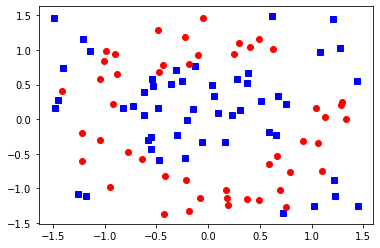

In [ ]:
# dataset 1
np.random.seed(123)
n = 100
x_d1 = 3 * (np.random.rand(n, 2)-0.5)
radius = x_d1[:,0]**2 + x_d1[:,1]**2
y_d1 = (radius > 0.7 + 0.1 * np.random.randn(n)) &( radius < 2.2 + 0.1 * np.random.randn(n))
y_d1 = 2 * y_d1 -1

plt.plot(x_d1[y_d1 < 0, 0],  x_d1[y_d1 < 0, 1], 'bs')
plt.plot(x_d1[y_d1 > 0, 0],  x_d1[y_d1 > 0, 1], 'ro')

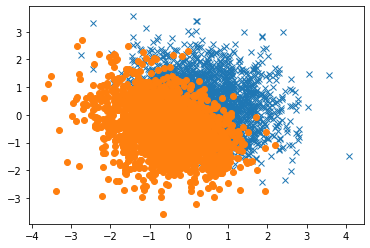

In [ ]:
# dataset 2
n = 4000
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x_d2 = np.random.randn(n, 2) + 0
y_d2 = 2 * (omega * x_d2[:,0] + x_d2[:,1] + noise > 0) - 1

plt.plot(np.extract(y_d2>0,x_d2[:,0]),np.extract(y_d2>0,x_d2[:,1]), 'x')
plt.plot(np.extract(y_d2<0,x_d2[:,0]),np.extract(y_d2<0,x_d2[:,1]), 'o')

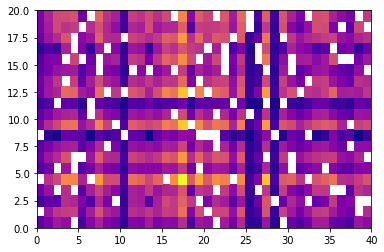

In [ ]:
#dataset3
np.random.seed(1234)
m = 20
n = 40
r = 2
A = np.dot(np.random.rand(m, r), np.random.rand(r, n)).flatten()
ninc = 100
Q = np.random.permutation(m * n)[:ninc]
A[Q] = None
A = A.reshape(m, n)

plt.pcolor(A, cmap=plt.cm.plasma)

In [ ]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

In [ ]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)

In [ ]:
# dataset 6
d_d6 = 200
n_d6 = 180

# we consider 5 groups where each group has 40 attributes
groupSize = 5
attrSize = 40
g_d6 = np.arange(groupSize*attrSize).reshape(groupSize,-1)

x_d6 = np.random.randn(n_d6, d_d6)
noise_d6 = 0.5

# we consider feature in group 1 and group 2 is activated.
w_d6 = np.vstack([20 * np.random.randn(80, 1),
                 np.zeros((120, 1)),
                 5 * np.random.rand()])
x_d6_tilde = np.hstack([x_d6, np.ones((n_d6, 1))])
y_d6 = np.dot(x_d6_tilde, w_d6) + noise_d6 * np.random.randn(n_d6, 1)

# Problem 1

In [ ]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy
import math

def j_fun(x, y, w):
  ret = 0.0
  for x_i, y_i in zip(x, y):
    ret += math.log(1 + math.exp(-y_i * np.dot(w, x_i)))
  ret += np.dot(w, w)
  return ret

def dj_fun(x, y, w):
  ret = np.zeros(4)
  for x_i, y_i in zip(x, y):
    ret += -y_i * x_i * (1 - (1 / (1 + math.exp(-y_i * np.dot(w, x_i)))))
  ret += 2 * w
  return ret

def hj_fun(x, y, w):
  ret = np.zeros((4,4))
  for x_i, y_i in zip(x, y):
    p_i = 1 / (1 + math.exp(-y_i * np.dot(w, x_i)))
    for j, x_ij in enumerate(x_i):
      ret[j] += y_i * y_i * p_i * (1 - p_i) * x_ij * x_i
  ret += np.identity(4)
  return ret


In [ ]:
#probrem1.1
loss_hist_batch = [] # to store the history of loss J(w_t)

w = np.zeros(len(x_d4[0]))

maxi = 50
eta = 0.01
for i in range(maxi):
  loss_hist_batch.append(j_fun(x_d4, y_d4, w))
  grad = dj_fun(x_d4, y_d4, w)
  w -= eta * grad

In [ ]:
#probrem1.2
loss_hist_newton = [] # to store the history of loss J(w_t)

w = np.zeros(len(x_d4[0]))
maxi = 50
for i in range(maxi):
  loss_hist_newton.append(j_fun(x_d4, y_d4, w))
  d = np.dot(np.linalg.inv(hj_fun(x_d4, y_d4, w)), dj_fun(x_d4, y_d4, w)) 
  w -= d

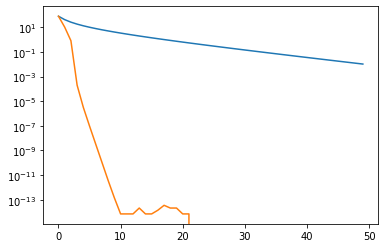

In [ ]:
#probrem1.3
# plot the result
plt.plot(abs(j_fun(x_d4, y_d4, w) - loss_hist_batch))
plt.plot(abs(j_fun(x_d4, y_d4, w) - loss_hist_newton))
plt.yscale('log')

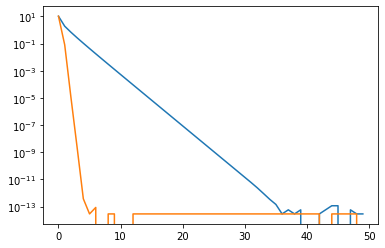

In [ ]:
#probrem1.4
loss_hist_batch = [] # to store the history of loss J(w_t)

w = np.zeros(len(x_d5[0]))

maxi = 50
eta = 0.01
for i in range(maxi):
  loss_hist_batch.append(j_fun(x_d5, y_d5, w))
  grad = dj_fun(x_d5, y_d5, w)
  w -= eta * grad


loss_hist_newton = [] # to store the history of loss J(w_t)

w = np.zeros(len(x_d5[0]))
maxi = 50
for i in range(maxi):
  loss_hist_newton.append(j_fun(x_d5, y_d5, w))
  d = np.dot(np.linalg.inv(hj_fun(x_d5, y_d5, w)), dj_fun(x_d5, y_d5, w)) 
  w -= d

# plot the result
plt.plot(abs(j_fun(x_d5, y_d5, w) - loss_hist_batch))
plt.plot(abs(j_fun(x_d5, y_d5, w) - loss_hist_newton))
plt.yscale('log')

# Problem 2

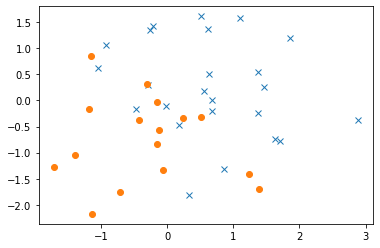

In [ ]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# prepare dataset
np.random.seed(3846)
n = 40
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x = np.random.randn(n, 2) + 0
y = 2 * (omega * x[:,0] + x[:,1] + noise > 0) - 1

plt.plot(np.extract(y>0,x[:,0]),np.extract(y>0,x[:,1]), 'x')
plt.plot(np.extract(y<0,x[:,0]),np.extract(y<0,x[:,1]), 'o')

In [ ]:
# condition
A = np.array([[  3, 0.5],
              [0.5,   1]])
mu = np.array([[1],
               [2]])

lambda = 0.0: w = [[1. 2.]]
lambda = 2.0: w = [[0.81818182 1.09090909]]
lambda = 4.0: w = [[0.63636364 0.18181818]]
lambda = 6.0: w = [[0.33333333 0.        ]]
lambda = 8.0: w = [[0. 0.]]
lambda = 10.0: w = [[0. 0.]]
lambda = 12.0: w = [[0. 0.]]
lambda = 14.0: w = [[0. 0.]]


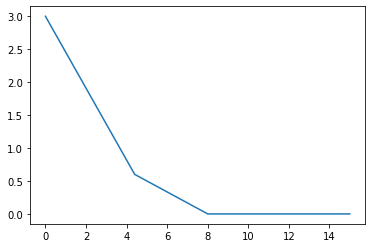

In [253]:
#probrem2.1 and 2.2
def l1_norm(lam, w):
  penalty = lam * np.sum(np.abs(w))
  return penalty

def prox_l1(w, eta, lam):
  w = w.reshape([2])
  prox = np.zeros(w.shape[0])
  thresh = eta * lam
  for i, w_i in enumerate(w):
    if w_i >= thresh:
      prox[i] = w_i - thresh
    elif w_i <= -thresh:
      prox[i] = w_i + thresh

  prox = prox.reshape([2,1])
  return prox

def l_fun(w, A, mu, lam):
  return np.dot(np.dot((w - mu).reshape([1,2]), A), (w - mu)) + l1_norm(lam, w)

def dl_fun(w, A, mu, lam):
  return np.dot((w - mu).reshape([1,2]), A).reshape([2,1]) + np.dot(A, (w - mu))

w_hat_lam = np.empty([0,2])
lams = np.arange(0, 15.1, 0.1)

eta = 0.1
for lam in lams:
  w = np.array([[3],
               [-1]])
  for i in range(200):
    w = prox_l1(w - eta * dl_fun(w, A, mu, lam), eta, lam)
  w = w.reshape([1, 2])
  if lam % 2 == 0:
    print('lambda = ' + str(lam) + ': w = ' + str(w))
  w_hat_lam = np.append(w_hat_lam, w, axis=0)

w_l1 = w_hat_lam[:,0] + w_hat_lam[:,1]
plt.plot(lams, w_l1)